<a href="https://colab.research.google.com/github/HwiTran/Natural-Language-Processing-Course/blob/main/Week_5_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install portalocker'>=2.0.0'
!pip install torchdata
!pip install datasets

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 27.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Demonstration on Transformer architecture

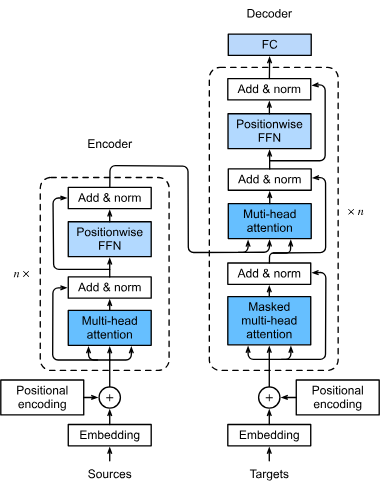

In [ ]:
import math
import os
from tempfile import TemporaryDirectory
from typing import Tuple

import numpy as np
import random, spacy, datasets

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

import torchtext
from torch.utils.data import dataset

# Word embedding

In [ ]:
class Embedding(nn.Module):
    ### START YOUR CODE HERE ###
    # Implement a class for embedding layer here
    def __init__(self,
                vocab_size: int,
                 embed_dim: int) -> None:
        """
        Args:
        vocab_size (int) -- size of vocabulary
        embed_dim (int) -- dimension of embeddings
        """
        ...

    def forward(self,
                x: torch.Tensor) -> torch.Tensor:
        """
        Args:
        x: input vector

        Returns:
        out: embedding vector
        """
        ...
    ### END YOUR CODE HERE

# Transformers

## Positional encoding

In order for the model to make sense of the sentence, it needs to know two things about the each word.
* What does the word mean?
* What is the position of the word in the sentence.

In the original Transformer paper [(Vaswani et al., 2017)](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf), the author used 2 below functions to create positional encoding. On odd time steps a cosine function is used and in even time steps a sine function is used.

$
PE_{pos,2i} = sin\left(\frac{pos}{(10^5)^{\frac{2i}{d_\text{model} }}}\right)
$

$
PE_{pos,2i+1} = cos\left(\frac{pos}{(10^5)^{\frac{2i}{d_\text{model} }}}\right)
$


Positinal embedding will **generate a matrix of similar to embedding matrix**. It will create a matrix of dimension sequence length `x` embedding dimension. For each token in sequence, we will find the embedding vector which is of dimension 1 x 512 and it is added with the correspondng positional vector which is of dimension 1 x 512 to get 1 x 512 dim out for each word/token.

For example, if we have batch size of 32 and seq length of 10 and let embedding dimension be 512. Then we will have embedding vector of dimension 32 x 10 x 512. Similarly we will have positional encoding vector of dimension 32 x 10 x 512. Then we add both.

![](https://aiml.com/wp-content/uploads/2023/09/example_of_positional_encoding_in_transformers.png)

whereas:
- `pos` refers to order in the sentence
- `i`  refers to position along embedding vector dimension


In [ ]:
class PositionalEmbedding(nn.Module):
    def __init__(self,
                 max_seq_len: int,
                 embed_model_dim: int) -> None:
        """
        Args:
        seq_len (int) -- length of input sequence
        embed_model_dim (int) -- demension of embedding
        """
        super(PositionalEmbedding, self).__init__()
        self.embed_dim = embed_model_dim

        pe = torch.zeros(max_seq_len, self.embed_dim)
        for pos in range(max_seq_len):
            for i in range(0, self.embed_dim, 2):
                ### START YOUR CODE HERE ###

                # Implement 2 positional encodings function (PE_{pos, 2i} & PE_{pos_{2i+1}}) here
                # PE_{pos,2i} = sin\left(\frac{pos}{(10^5)^{\frac{2i}{d_\text{model} }}}\right)
                # PE_{pos,2i+1} = cos\left(\frac{pos}{(10^5)^{\frac{2i}{d_\text{model} }}}\right)

                pe[pos, i] = ...
                pe[pos, i + 1] = ...

                ### END YOUR CODE HERE ###
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)


    def forward(self,
                x: torch.Tensor) -> torch.Tensor:
        """
        Args:
        x: input vector

        Returns:
        x: output
        """
        # Make embeddings relatively larger
        x = x * math.sqrt(self.embed_dim)
        # Add constant to embedding
        seq_len = x.size(1)
        x = x + torch.autograd.Variable(self.pe[:,:seq_len], requires_grad=False)
        return x

## Self-attention & Multi-head attention

***What is self attention?***

Suppose we have a sentence `Dog is crossing the street because it saw the kitchen`. What does it refers to here? It's easy to understand for the humans that it is Dog. But not for the machines.

As model proceeses each word, self attention allows it to look at other positions in the input sequence for clues. It will creates a vector based on dependency of each word with the other.


Let us go through a step by step illustration of self attention.

* **Step 1:** The first step in calculating self-attention is to create three vectors from each of the encoder’s input vectors (in this case, the embedding of each word). So for each word, we create a Query vector, a Key vector, and a Value vector. Each of the vector will be of dimension 1x64.

Since we have a multihead attention we will have 8 self attention heads.I will explain the code with 8 attention head in mind.

**How key,queries and values can be created?**

We will have a key matrix,query matrix and a value matrix to generate key, query and value.
These matrixes are learned during training.


* **Step 2:**  Second step is to calculate the score. ie, we will multiply query marix with key matrix. [Q x K.t]



* **Step 3:** Now divide the output matrix with square root of dimension of key matrix and then apply Softmax over it.


* **Step 4:** Then this gets multiply it with value matrix.


* **Step 5:** Once we have this we will pass this through a linear layer. This forms the output of multihead attention.

In [ ]:
embed_dim = 512
num_heads = 8

multihead_attn = nn.MultiheadAttention(embed_dim, num_heads)
multihead_attn

MultiheadAttention(
  (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
)

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self,
                 embed_dim: int = 512,
                 n_heads: int = 8) -> None:
        """
        Args:
        embed_dim: dimension of embeding vector output
        n_heads: number of self attention heads
        """
        super(MultiHeadAttention, self).__init__()

        self.embed_dim = embed_dim # dim = 512
        self.n_heads = n_heads # dim = 8

        # dim = 512/8 = 64
        # Dach key,query, value will be of 64 dimensions
        self.single_head_dim = int(self.embed_dim / self.n_heads)

        # key, query and value matrices
        # 64 x 64
        self.query_matrix = nn.Linear(self.single_head_dim , self.single_head_dim ,bias=False)  # single key matrix for all 8 keys #512x512
        self.key_matrix = nn.Linear(self.single_head_dim  , self.single_head_dim, bias=False)
        self.value_matrix = nn.Linear(self.single_head_dim ,self.single_head_dim , bias=False)
        self.out = nn.Linear(self.n_heads*self.single_head_dim ,self.embed_dim)

    def forward(self,
                key: torch.Tensor,
                query: torch.Tensor,
                value: torch.Tensor,
                mask: torch.Tensor = None) -> torch.Tensor:
        """
        Args:
        key : key vector
        query : query vector
        value : value vector
        mask: mask for decoder

        Returns:
        Output vector from multihead attention
        batch_size x sequence_length x embedding_dim = dim: 32 x 10 x 512
        """
        batch_size = key.size(0)
        seq_length = key.size(1)

        # Query dimension can change in decoder during inference.
        # So we cant take general seq_length
        seq_length_query = query.size(1)

        # 32x10x512
        key = key.view(batch_size, seq_length, self.n_heads, self.single_head_dim)  #batch_size x sequence_length x n_heads x single_head_dim = (32x10x8x64)
        query = query.view(batch_size, seq_length_query, self.n_heads, self.single_head_dim) #(32x10x8x64)
        value = value.view(batch_size, seq_length, self.n_heads, self.single_head_dim) #(32x10x8x64)

        k = self.key_matrix(key)       # (32x10x8x64)
        q = self.query_matrix(query)
        v = self.value_matrix(value)

        q = q.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)    # (32 x 8 x 10 x 64)
        k = k.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)
        v = v.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)

        # computes attention
        # adjust key for matrix multiplication
        k_adjusted = k.transpose(-1,-2)  #(batch_size, n_heads, single_head_dim, seq_ken)  #(32 x 8 x 64 x 10)
        product = torch.matmul(q, k_adjusted)  #(32 x 8 x 10 x 64) x (32 x 8 x 64 x 10) = #(32x8x10x10)


        # fill those positions of product matrix as (-1e20) where mask positions are 0
        if mask is not None:
             product = product.masked_fill(mask == 0, float("-1e20"))

        #divising by square root of key dimension
        product = product / math.sqrt(self.single_head_dim) # / sqrt(64)

        #applying softmax
        scores = F.softmax(product, dim=-1)

        #mutiply with value matrix
        scores = torch.matmul(scores, v)  ##(32x8x 10x 10) x (32 x 8 x 10 x 64) = (32 x 8 x 10 x 64)

        #concatenated output
        concat = scores.transpose(1,2).contiguous().view(batch_size, seq_length_query, self.single_head_dim*self.n_heads)  # (32x8x10x64) -> (32x10x8x64)  -> (32,10,512)

        output = self.out(concat) #(32,10,512) -> (32,10,512)

        return output

## Transformer block


In [ ]:
class TransformerBlock(nn.Module):
    def __init__(self,
                 embed_dim: int,
                 expansion_factor: int = 4,
                 n_heads: int = 8) -> None:
        """
        Args:
        embed_dim (int) -- Dimension embedding
        expansion_factor (int) -- Factor which determines output dimension of linear layer
        n_heads (int) -- Number of attention heads
        """
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadAttention(embed_dim, n_heads)

        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)

        # Feed forward network (Fully connected layer)
        self.feed_forward = nn.Sequential(
                          nn.Linear(embed_dim,
                                    expansion_factor*embed_dim),
                          nn.ReLU(),
                          nn.Linear(expansion_factor*embed_dim,
                                    embed_dim)
        )

        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)

    def forward(self,
                key: torch.Tensor,
                query: torch.Tensor,
                value: torch.Tensor) -> torch.Tensor:
        """
        Args:
        key -- Key vector
        query -- Query vector
        value -- Value vector

        Returns:
        (torch.Tensor) -- Output of Transformer block after passing data to the model
        """

        attention_out = self.attention(key, query, value)  #32x10x512
        attention_residual_out = attention_out + value  #32x10x512
        norm1_out = self.dropout1(self.norm1(attention_residual_out)) #32x10x512

        feed_fwd_out = self.feed_forward(norm1_out) #32x10x512 -> #32x10x2048 -> 32x10x512
        feed_fwd_residual_out = feed_fwd_out + norm1_out #32x10x512
        norm2_out = self.dropout2(self.norm2(feed_fwd_residual_out)) #32x10x512

        return norm2_out

## Encoder

Ok, now a sudden question can strike your mind. What is this mask used for? Don't worry we will go through it once we are talking about the decoder.

![](https://www.researchgate.net/profile/Ehsan-Amjadian/publication/352239001/figure/fig1/AS:1033334390013952@1623377525434/Detailed-view-of-a-transformer-encoder-block-It-first-passes-the-input-through-an.jpg)



In the encoder section -

**Step 1:** First input(padded tokens corresponding to the sentence) get passes through embedding layer and positional encoding layer.


**Step 2:** As discussed above it will passed through the multihead attention layer and creates useful representational matrix as output.

**Step 3:** Next we have a normalization and residual connection. The output from multihead attention is added with its input and then normalized.

**Step 4:** Next we have a feed forward layer and a then normalization layer with residual connection from input(input of feed forward layer) where we passes the output after normalization though it and finally gets the output of encoder.

In [ ]:
class TransformerEncoder(nn.Module):
    def __init__(self,
                 seq_len,
                 vocab_size,
                 embed_dim,
                 num_layers=2,
                 expansion_factor=4,
                 n_heads=8) -> None:
        """
        Args:
        seq_len (int) -- length of input sequence
        embed_dim (int) -- dimension of embedding
        num_layers (int) -- number of encoder layers
        expansion_factor (int) -- factor which determines number of linear layers in feed forward layer
        n_heads (int) number of heads in multihead attention
        """
        super(TransformerEncoder, self).__init__()

        self.embedding_layer = Embedding(vocab_size, embed_dim)
        self.positional_encoder = PositionalEmbedding(seq_len, embed_dim)

        self.layers = nn.ModuleList(
            [
                TransformerBlock(embed_dim, expansion_factor, n_heads)
                for i in range(num_layers)
            ]
        )

    def forward(self,
                x: torch.Tensor) -> torch.Tensor:
        """
        Forward passing

        Args:
        x (torch.Tensor) -- Input tensor

        Returns:
        (torch.Tensor) -- Model's output after being forward-passed
        """
        ### START YOUR CODE HERE ###
        # Your task is to define a pipeline for forward passing process
        # to receive a tensor vector and return a tensor encoded vector
        # x -> embedding_layer -> positional_encoder -> n Transformer layers -> output

        ...

        ### END YOUR CODE HERE ###

## Decoder


Now we have gone through most parts of the encoder. Let us get in to the components of the decoder. We will use the output of encoder to generate key and value vectors for the decoder.There are two kinds of multi head attention in the decoder.One is the decoder attention and other is the encoder decoder attention. Don't worry we will go step by step.


**Step 1:**

First, the output gets passed through the embedding and positional encoding to create a embedding vector of dimension 1x512 corresponding to each word in the target sequence.



**Step 2:**

The embeddig output gets passed through a multihead attention layers as before(creating key,query and value matrixes from the target input) and produces an output vector. This time the major difference is that we uses a mask with multihead attention.

**Why mask?**

Mask is used because while creating attention of target words, we donot need a word to look in to the future words to check the dependency. ie, we already learned that why we create attention because we need to know contribution of each word with the other word. Since we are creating attention for words in target sequnce, we donot need a particular word to see the future words. For eg: in word "I am a strudent", we donot need the word "a" to look word "student".

**Step 3:**

As before we have a add and norm layer where we add with output of embedding with attention out and normalized it.


**Step 4:**


Next we have another multihead attention and then a add and norm layer. This multihead attention is called encoder-decorder multihead attention. For this multihead attention we create we create key and value vectors from the encoder output. Query is created from the output of previous decoder layer.


Thus it is passed through a multihead atention (we used number of heads = 8) the through a Add and Norm layer. Here the output from previous encoder layer(ie previoud add and norm layer) gets added with encoder-decoder attention output and then normalized.

**Step 5:**
Next we have a feed forward layer(linear layer) with add and nom which is similar to that of present in the encoder.


**Step 6:**
Finally we create a linear layer with length equal to number of words in total target corpus and a softmax function with it to get probablity of each word.

In [ ]:
class DecoderBlock(nn.Module):
    def __init__(self,
                 embed_dim,
                 expansion_factor=4,
                 n_heads=8) -> None:
        """
        Args:
        embed_dim (int) -- Embedding dimension
        expansion_factor (int) -- Factor which determines output dimension of linear layer
        n_heads (int) -- Number of attention heads
        """
        super(DecoderBlock, self).__init__()
        self.attention = MultiHeadAttention(embed_dim,
                                            n_heads=n_heads)
        self.norm = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(0.2)
        self.transformer_block = TransformerBlock(embed_dim,
                                                  expansion_factor,
                                                  n_heads)

    def forward(self,
                key: torch.Tensor,
                query: torch.Tensor,
                x: torch.Tensor,
                mask) -> torch.Tensor:
        """
        Args:
        key (torch.Tensor) -- Key vector
        query (torch.Tensor) -- Query vector
        value (torch.Tensor) -- Value vector
        mask (torch.Tensor) -- Mask to be given for multi head attention

        Returns:
        out (torch.Tensor) -- Output of transformer block
        """
        # We need to pass mask mask only to attention
        attention = self.attention(x,
                                   x,
                                   x,
                                   mask=mask) #32x10x512
        value = self.dropout(self.norm(attention + x))
        out = self.transformer_block(key, query, value)
        return out

In [ ]:
class TransformerDecoder(nn.Module):
    def __init__(self, target_vocab_size, embed_dim, seq_len, num_layers=2, expansion_factor=4, n_heads=8):
        super(TransformerDecoder, self).__init__()
        """
        Args:
           target_vocab_size: vocabulary size of taget
           embed_dim: dimension of embedding
           seq_len : length of input sequence
           num_layers: number of encoder layers
           expansion_factor: factor which determines number of linear layers in feed forward layer
           n_heads: number of heads in multihead attention

        """
        self.word_embedding = nn.Embedding(target_vocab_size, embed_dim)
        self.positional_embedding = PositionalEmbedding(seq_len, embed_dim)

        self.layers = nn.ModuleList(
            [
                DecoderBlock(embed_dim, expansion_factor=4, n_heads=8)
                for _ in range(num_layers)
            ]
        )
        self.fc_out = nn.Linear(embed_dim, target_vocab_size)
        self.dropout = nn.Dropout(0.2)

    def forward(self,
                x: torch.Tensor,
                encoder_out: torch.Tensor,
                mask: torch.Tensor) -> torch.Tensor:

        """
        Args:
        x (torch.Tensor) -- Input vector from target
        encoder_out (torch.Tensor) -- Output from encoder layer
        trg_mask (torch.Tensor) -- Mask for decoder self attention

        Returns:
        (torch.Tensor) -- Output tensor
        """
        ### START YOUR CODE HERE ###
        # Create a workflow from input to output for Decoder layer
        # x -> word_embedding -> positional_embedding -> dropout -> Decoder layers -> output

        ...

        ### END YOUR CODE HERE ###

## Transformer model

Finally we will arrange all submodules and creates the entire tranformer architecture.

In [ ]:
class Transformer(nn.Module):
    def __init__(self,
                 embed_dim: int,
                 source_vocab_size: int,
                 target_vocab_size: int,
                 seq_length: int,
                 num_layers: int = 2,
                 expansion_factor: int = 4,
                 n_heads: int = 8):
        """
        Args:
        embed_dim (int) -- Embedding dimension
        source_vocab_size (int) -- Input's vocabulary size
        target_vocab_size (int) -- Target's vocabulary size
        seq_length (int) -- Length of input sequence
        num_layers (int) -- Number of encoder layers
        expansion_factor (int) -- Factor which determines number of linear layers in feed forward layer
        n_heads (int) -- Number of heads in multihead attention
        """
        super(Transformer, self).__init__()

        self.target_vocab_size = target_vocab_size

        ### START YOUR CODE HERE ###
        # Declare encoder and decoder components

        self.encoder = ...
        self.decoder = ...

        ### END YOUR CODE HERE ###

    def make_target_mask(self,
                      target: torch.Tensor):
        """
        Args:
        target (torch.Tensor) -- Target sequence

        Returns:
        target_mask: target mask
        """
        batch_size, target_len = target.shape
        # Returns the lower triangular part of matrix filled with ones
        target_mask = torch.tril(
            torch.ones((target_len, target_len))
            ).expand(batch_size, 1, target_len, target_len)
        return target_mask

    def decode(self,
               source: torch.Tensor,
               target: torch.Tensor) -> torch.Tensor:
        """
        Args:
        source (torch.Tensor) -- Input to encoder
        target (torch.Tensor) -- Input to decoder

        Returns:
        (torch.Tensor) -- Returns final prediction of sequence
        """
        target_mask = self.make_target_mask(target)
        enc_out = self.encoder(source)
        out_labels = []
        batch_size,seq_len = source.shape[0],source.shape[1]
        out = target
        for i in range(seq_len): #10
            out = self.decoder(out,enc_out,target_mask) #bs x seq_len x vocab_dim
            # Take the last token
            out = out[:,-1,:]
            out = out.argmax(-1)
            out_labels.append(out.item())
            out = torch.unsqueeze(out,axis=0)

        return out_labels

    def forward(self,
                source: torch.Tensor,
                target: torch.Tensor):
        """
        Args:
        source (torch.Tensor) -- Input to encoder
        target (torch.Tensor) -- Input to decoder

        Returns:
        (torch.Tensor) -- Vector which returns probabilities of each target word
        """
        target_mask = self.make_target_mask(target)
        encoder_out = self.encoder(source)
        outputs = self.decoder(target, encoder_out, target_mask)
        return outputs

# NMT data

In [ ]:
dataset = datasets.load_dataset("bentrevett/multi30k")

train_data, valid_data, test_data = (
    dataset["train"],
    dataset["validation"],
    dataset["test"],
)

In [ ]:
train_data[0]

{'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.'}

In [ ]:
en_nlp = spacy.load("en_core_web_sm")
de_nlp = spacy.load("de_core_news_sm")

We can call the tokenizer for each spaCy model using the `.tokenizer` method, which accepts a string and returns a sequence of `Token` objects. We can get the string from the token object using the `text` attribute.


In [ ]:
string = "What a lovely day it is today!"

[token.text for token in en_nlp.tokenizer(string)]

['What', 'a', 'lovely', 'day', 'it', 'is', 'today', '!']

In [ ]:
def tokenize_example(example, en_nlp, de_nlp, max_length, lower, sos_token, eos_token):
    en_tokens = [token.text for token in en_nlp.tokenizer(example["en"])][:max_length]
    de_tokens = [token.text for token in de_nlp.tokenizer(example["de"])][:max_length]
    if lower:
        en_tokens = [token.lower() for token in en_tokens]
        de_tokens = [token.lower() for token in de_tokens]
    en_tokens = [sos_token] + en_tokens + [eos_token]
    de_tokens = [sos_token] + de_tokens + [eos_token]
    return {"en_tokens": en_tokens, "de_tokens": de_tokens}

In [ ]:
max_length = 1_000
lower = True
sos_token = "<sos>"
eos_token = "<eos>"

fn_kwargs = {
    "en_nlp": en_nlp,
    "de_nlp": de_nlp,
    "max_length": max_length,
    "lower": lower,
    "sos_token": sos_token,
    "eos_token": eos_token,
}

train_data = train_data.map(tokenize_example, fn_kwargs=fn_kwargs)
valid_data = valid_data.map(tokenize_example, fn_kwargs=fn_kwargs)
test_data = test_data.map(tokenize_example, fn_kwargs=fn_kwargs)

Map:   0%|          | 0/1014 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
train_data[0]

{'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.',
 'en_tokens': ['<sos>',
  'two',
  'young',
  ',',
  'white',
  'males',
  'are',
  'outside',
  'near',
  'many',
  'bushes',
  '.',
  '<eos>'],
 'de_tokens': ['<sos>',
  'zwei',
  'junge',
  'weiße',
  'männer',
  'sind',
  'im',
  'freien',
  'in',
  'der',
  'nähe',
  'vieler',
  'büsche',
  '.',
  '<eos>']}

In [ ]:
min_freq = 2
unk_token = "<unk>"
pad_token = "<pad>"

special_tokens = [
    unk_token,
    pad_token,
    sos_token,
    eos_token,
]

en_vocab = torchtext.vocab.build_vocab_from_iterator(
    train_data["en_tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)

de_vocab = torchtext.vocab.build_vocab_from_iterator(
    train_data["de_tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)

In [ ]:
len(en_vocab), len(de_vocab)

(5893, 7853)

In [ ]:
en_vocab.get_itos()[:10]

['<unk>', '<pad>', '<sos>', '<eos>', 'a', '.', 'in', 'the', 'on', 'man']

In [ ]:
de_vocab.get_itos()[:10]

['<unk>', '<pad>', '<sos>', '<eos>', '.', 'ein', 'einem', 'in', 'eine', ',']

In [ ]:
unk_index = en_vocab[unk_token]
pad_index = en_vocab[pad_token]

In [ ]:
en_vocab.set_default_index(unk_index)
de_vocab.set_default_index(unk_index)

In [ ]:
en_vocab["The"]

0

In [ ]:
en_vocab.get_itos()[0]

'<unk>'

In [ ]:
tokens = ["i", "love", "watching", "crime", "shows"]

In [ ]:
en_vocab.lookup_indices(tokens)

[956, 2169, 173, 0, 821]

Conversely, we can use the `lookup_tokens` method to convert a list of indices back into tokens using the vocabulary. Notice how the original "crime" token is now an `<unk>` token. There is no way to tell what the original sequence of tokens was.


In [ ]:
en_vocab.lookup_tokens(en_vocab.lookup_indices(tokens))

['i', 'love', 'watching', '<unk>', 'shows']

Hopefully we've now got the gist of how the `torchtext.Vocab` class works. Time to put it into action!

Just like our `tokenize_example`, we create a `numericalize_example` function which we'll use with the `map` method of our dataset. This will "numericalize" (a fancy way of saying convert tokens to indices) our tokens in each example using the vocabularies and return the result into new "en_ids" and "de_ids" features.


In [ ]:
def numericalize_example(example, en_vocab, de_vocab):
    en_ids = en_vocab.lookup_indices(example["en_tokens"])
    de_ids = de_vocab.lookup_indices(example["de_tokens"])
    return {"en_ids": en_ids, "de_ids": de_ids}

We apply the `numericalize_example` function, passing our vocabularies in the `fn_kwargs` dictionary to the `fn_kwargs` argument.


In [ ]:
fn_kwargs = {"en_vocab": en_vocab, "de_vocab": de_vocab}

train_data = train_data.map(numericalize_example, fn_kwargs=fn_kwargs)
valid_data = valid_data.map(numericalize_example, fn_kwargs=fn_kwargs)
test_data = test_data.map(numericalize_example, fn_kwargs=fn_kwargs)

Map:   0%|          | 0/29000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1014 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Checking an example, we can see that it has the two new features: "en_ids" and "de_ids", both a list of integers representing their indices in the respective vocabulary.


In [ ]:
train_data[0]

{'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.',
 'en_tokens': ['<sos>',
  'two',
  'young',
  ',',
  'white',
  'males',
  'are',
  'outside',
  'near',
  'many',
  'bushes',
  '.',
  '<eos>'],
 'de_tokens': ['<sos>',
  'zwei',
  'junge',
  'weiße',
  'männer',
  'sind',
  'im',
  'freien',
  'in',
  'der',
  'nähe',
  'vieler',
  'büsche',
  '.',
  '<eos>'],
 'en_ids': [2, 16, 24, 15, 25, 778, 17, 57, 80, 202, 1312, 5, 3],
 'de_ids': [2, 18, 26, 253, 30, 84, 20, 88, 7, 15, 110, 7647, 3171, 4, 3]}

In [ ]:
en_vocab.lookup_tokens(train_data[0]["en_ids"])

['<sos>',
 'two',
 'young',
 ',',
 'white',
 'males',
 'are',
 'outside',
 'near',
 'many',
 'bushes',
 '.',
 '<eos>']

In [ ]:
data_type = "torch"
format_columns = ["en_ids", "de_ids"]

train_data = train_data.with_format(
    type=data_type, columns=format_columns, output_all_columns=True
)

valid_data = valid_data.with_format(
    type=data_type,
    columns=format_columns,
    output_all_columns=True,
)

test_data = test_data.with_format(
    type=data_type,
    columns=format_columns,
    output_all_columns=True,
)

In [ ]:
train_data[0]

{'en_ids': tensor([   2,   16,   24,   15,   25,  778,   17,   57,   80,  202, 1312,    5,
            3]),
 'de_ids': tensor([   2,   18,   26,  253,   30,   84,   20,   88,    7,   15,  110, 7647,
         3171,    4,    3]),
 'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.',
 'en_tokens': ['<sos>',
  'two',
  'young',
  ',',
  'white',
  'males',
  'are',
  'outside',
  'near',
  'many',
  'bushes',
  '.',
  '<eos>'],
 'de_tokens': ['<sos>',
  'zwei',
  'junge',
  'weiße',
  'männer',
  'sind',
  'im',
  'freien',
  'in',
  'der',
  'nähe',
  'vieler',
  'büsche',
  '.',
  '<eos>']}

## Create Dataloader for Transformers to train and evaluate

In [ ]:
### START YOUR CODE HERE ###
# Your task is to build a dataloader to load train & test tensor
# from the aforegiven dataset

### END YOUR CODE HERE ###

# Apply model

## Define model

In [ ]:
"""
Hyperparameters configuration

Try changing the following hyperparameters to:
- Observe its effect on the model performance
- Boost its performance on the given dataset
"""
source_vocab_size = 11
target_vocab_size = 11
num_layers = 6
seq_length= 12
embed_dim = 512
expansion_factor = 4
n_heads = 8

In [ ]:
model = Transformer(embed_dim=embed_dim,
                    source_vocab_size=source_vocab_size,
                    target_vocab_size=target_vocab_size,
                    seq_length=seq_length,
                    num_layers=num_layers,
                    expansion_factor=expansion_factor,
                    n_heads=n_heads)
model

Transformer(
  (encoder): TransformerEncoder(
    (embedding_layer): Embedding(
      (embed): Embedding(11, 512)
    )
    (positional_encoder): PositionalEmbedding()
    (layers): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadAttention(
          (query_matrix): Linear(in_features=64, out_features=64, bias=False)
          (key_matrix): Linear(in_features=64, out_features=64, bias=False)
          (value_matrix): Linear(in_features=64, out_features=64, bias=False)
          (out): Linear(in_features=512, out_features=512, bias=True)
        )
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (feed_forward): Sequential(
          (0): Linear(in_features=512, out_features=2048, bias=True)
          (1): ReLU()
          (2): Linear(in_features=2048, out_features=512, bias=True)
        )
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): 

## Model QA

In [ ]:
# QA for model's forward passing
start_of_string_token = 0
end_of_string_token = 1

src = torch.tensor([[start_of_string_token, 2, 5, 6, 4, 3, 9, 5, 2, 9, 10, end_of_string_token],
                    [start_of_string_token, 2, 8, 7, 3, 4, 5, 6, 7, 2, 10, end_of_string_token]])
target = torch.tensor([[start_of_string_token, 1, 7, 4, 3, 5, 9, 2, 8, 10, 9, end_of_string_token],
                       [start_of_string_token, 1, 5, 6, 2, 4, 7, 6, 2, 8, 10, end_of_string_token]])
out = model(src, target)
out.shape

<ipython-input-120-e25e834bee75>:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(self.fc_out(x))


torch.Size([2, 12, 11])

In [ ]:
# QA for model's final decoding
src = torch.tensor([[start_of_string_token, 2, 5, 6, 4, 3, 9, 5, 2, 9, 10, end_of_string_token]])
trg = torch.tensor([[start_of_string_token]])
out = model.decode(src, trg)
out

<ipython-input-120-e25e834bee75>:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(self.fc_out(x))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Model training

In [ ]:
"""
Model training
"""
### START YOUR CODE HERE ###

### END YOUR CODE HERE ###

## Model evaluation

In [ ]:
"""
Model evaluation
"""
### START YOUR CODE HERE ###

### END YOUR CODE HERE ###